https://colab.research.google.com/drive/1fTBX7-fI6pyLPk3mMNdhP5gUcMeaef3f?authuser=1#scrollTo=1uzd4DpDG--J

https://colab.research.google.com/drive/1U513UUXfRY5o2ZXs82kgFaG6lZhdUbji?authuser=1#scrollTo=0-z_WkeNzz5s

https://chatgpt.com/share/68336d34-11e4-8011-b2bf-9928639d3cb2

## Este colab tem como objetivo estudar o comportamento da base do tesouro direto

## Desafio
### Desenvolver solução baseada em dados para identificar perfis de investidores para o produto <b>tesouro direto<b>

In [1]:
# pip install scikit-learn
# !pip install pyarrow
# !pip install seaborn


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# import itables
# from itables import init_notebook_mode
# init_notebook_mode(all_interactive=True)

In [3]:
dados_tesouro = pd.read_parquet("nfce_autorizada.parquet")

In [4]:
# dados_tesouro

In [5]:
# dados_tesouro.Profissao.values

In [6]:
dados_tesouro['Situacao da Conta'].unique()

array(['D', 'A'], dtype=object)

In [7]:
min_val_idade = dados_tesouro.Idade.min()
max_val_idade = dados_tesouro.Idade.max()
ind_max_val_idade = dados_tesouro.Idade.idxmax()
print("Valor minimo de idade: ", min_val_idade)
print("Valor maximo de idade: ", max_val_idade)
print("Index do valor maximo de idade: ", ind_max_val_idade)

Valor minimo de idade:  0
Valor maximo de idade:  118
Index do valor maximo de idade:  553788


In [8]:
# dados_tesouro.loc[dados_tesouro['Idade'].idxmax()]
# dados_tesouro.loc[dados_tesouro['Idade'].idxmin()]
# len(dados_tesouro)
# dados_tesouro.describe()
# dados_tesouro['Profissao'].value_counts().describe()
# dados_tesouro.info()

# 1. Pré-processamento dos dados

## 1.1 Converter varaiveis categoricas em numericas, usando One-Hot Encoding ou Label Enconding
Ex.: Profissao, Estado Civil, Genero

In [8]:
len(dados_tesouro['UF do Investidor'].unique())

27

In [9]:
# # dados_tesouro_encoded = pd.get_dummies(dados_tesouro, columns=['Profissao', 'Estado Civil', 'Genero'], drop_first=True)
# dados_tesouro_encoded = dados_tesouro.copy()
# dados_tesouro_encoded = dados_tesouro_encoded.drop(columns=['Profissao', 'Estado Civil'])
# dados_tesouro_encoded = pd.get_dummies(dados_tesouro_encoded, columns=['Genero'])
# dados_tesouro_encoded = dados_tesouro_encoded.drop(columns=['Codigo do Investidor', 'Data de Adesao', 'UF do Investidor','Cidade do Investidor', 'Pais do Investidor'])

In [10]:
# dados_tesouro_encoded = pd.get_dummies(dados_tesouro, columns=['Profissao', 'Estado Civil', 'Genero'], drop_first=True)
dados_tesouro_encoded = dados_tesouro.copy()
dados_tesouro_encoded = pd.get_dummies(dados_tesouro_encoded, columns=['Genero', 'Pais do Investidor', 'UF do Investidor', 'Profissao', 'Estado Civil'])
dados_tesouro_encoded = dados_tesouro_encoded.drop(columns=['Codigo do Investidor', 'Data de Adesao', 'Cidade do Investidor'])

In [11]:
dados_tesouro_encoded

,Idade,Situacao da Conta,Operou 12 Meses,Genero_F,Genero_M,Genero_N,Pais do Investidor_BRASIL,UF do Investidor_AC,UF do Investidor_AL,UF do Investidor_AM,...,Estado Civil_Casado(a) com brasileiro(a) nato(a),Estado Civil_Casado(a) com brasileiro(a) naturalizado(a),Estado Civil_Casado(a) com estrangeiro(a),Estado Civil_Desquitado(a),Estado Civil_Divorciado(a),Estado Civil_Não se aplica,Estado Civil_Separado judic.,Estado Civil_Solteiro(a),Estado Civil_União estável,Estado Civil_Viúvo(a)
0,57,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,41,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,42,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,43,D,N,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,73,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,43,D,N,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1048571,34,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1048572,27,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1048573,38,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


## 1.2 Normalizar vaiveis numericas como Idade

In [12]:
dados_tesouro['Situacao da Conta'].unique()
dados_tesouro['Operou 12 Meses'].unique()

array(['N', 'S'], dtype=object)

In [13]:
scaler = MinMaxScaler()

dados_tesouro_encoded['Idade'] = scaler.fit_transform(dados_tesouro[['Idade']])
dados_tesouro_encoded = dados_tesouro_encoded.rename(columns={'Idade': 'Idade_normalizada'})

## 1.3 Converter "Operou 12 Meses" e "Situacao" da Conta para booleanos.

In [14]:
dados_tesouro_encoded['Operou 12 Meses'] = dados_tesouro['Operou 12 Meses'].map({'S': True, 'N': False})
dados_tesouro_encoded['Situacao da Conta'] = dados_tesouro['Situacao da Conta'].map({'A': True, 'D': False})

# dados_tesouro_encoded[['Situacao da Conta', 'Operou 12 Meses']] = dados_tesouro_encoded[['Situacao da Conta', 'Operou 12 Meses']].astype(float)

dados_tesouro_encoded = dados_tesouro_encoded.astype(float)


In [15]:
dados_tesouro_encoded

,Idade_normalizada,Situacao da Conta,Operou 12 Meses,Genero_F,Genero_M,Genero_N,Pais do Investidor_BRASIL,UF do Investidor_AC,UF do Investidor_AL,UF do Investidor_AM,...,Estado Civil_Casado(a) com brasileiro(a) nato(a),Estado Civil_Casado(a) com brasileiro(a) naturalizado(a),Estado Civil_Casado(a) com estrangeiro(a),Estado Civil_Desquitado(a),Estado Civil_Divorciado(a),Estado Civil_Não se aplica,Estado Civil_Separado judic.,Estado Civil_Solteiro(a),Estado Civil_União estável,Estado Civil_Viúvo(a)
0,0.483051,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.347458,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.355932,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.364407,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.618644,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0.364407,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1048571,0.288136,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1048572,0.228814,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1048573,0.322034,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
dados_tesouro_encoded.Idade_normalizada.iloc[553788]

np.float64(1.0)

## Analisar apenas um sample

In [17]:
from sklearn.metrics import pairwise_distances

# del dados_tesouro
df_features = dados_tesouro_encoded.copy().sample(n=100000, random_state=42)
del dados_tesouro_encoded
del dados_tesouro
import gc
gc.collect()


0

In [18]:
import psutil
process = psutil.Process()
print(f"Memória usada: {process.memory_info().rss / 1024 ** 2:.2f} MB")

mem = psutil.virtual_memory()
print(f"Memória total: {mem.total / 1024 ** 2:.2f} MB")
print(f"Memória disponível: {mem.available / 1024 ** 2:.2f} MB")
print(f"Uso de memória: {mem.percent:.2f}%")


Memória usada: 2460.73 MB
Memória total: 515788.58 MB
Memória disponível: 459558.02 MB
Uso de memória: 10.90%


# Tecnicas de clusterizacao

In [ ]:
# Calcula a matriz de distância de Hamming
matriz_dist_hamming = pairwise_distances(df_features, metric='hamming')

print(matriz_dist_hamming)

In [119]:
# import seaborn as sns
# import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# # 3. Plotar heatmap
# sns.heatmap(matriz_dist_hamming, annot=True, cmap='viridis', xticklabels=df_features.index, yticklabels=df_features.index)
# plt.title('Matriz de Distância (Hamming)')
# plt.xlabel('Cliente')
# plt.ylabel('Cliente')
# plt.show()

# 4. Clustering (ex: Agglomerative Clustering com 8 grupos)
clustering = AgglomerativeClustering(n_clusters=6, metric='precomputed', linkage='average')
labels = clustering.fit_predict(matriz_dist_hamming)

In [120]:
# Mostrar os grupos
df_features['Cluster'] = labels

## Teste 1: Redução de Dimensionalidade (com PCA ou t-SNE)

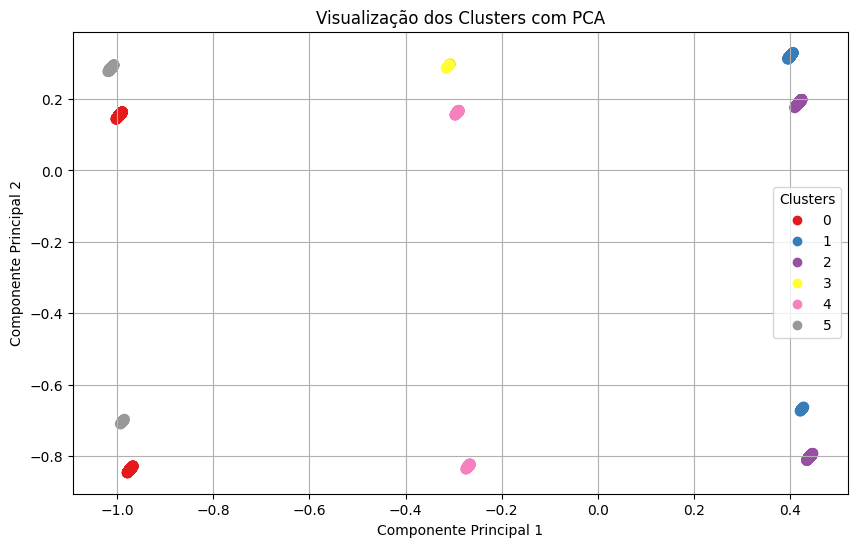

In [121]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduz os dados para 2 dimensões
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_features.drop('Cluster', axis=1))

# Plota os clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_features['Cluster'], cmap='Set1', s=50)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()
